<h1 style="color: indigo; font-family: 'Arial', sans-serif; font-weight: bold; font-size: 48px;">Employee Data Case Study</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 15px; font-weight: bold;">
Concepts used
</p>
<p style="font-family: 'Arial', sans-serif; font-size: 15px;">
We start with cleaning the data followed by handling the missing variables.
We then do exploratory data analysis on the data.
We cross-check our top features on the model using Logistic Regression and Random Forest Model
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 15px; font-weight: bold;">
<strong>Problem Statement</strong>
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 15px;">
XYZ company HR has recently noticed an increase in their attrition rate 
compared to what they have seen last year. They feel that there are some 
specific reasons driving the higher observed attrition rate. They have 
approached you to analyse the data and give them insights and recommendations 
on 1. Causes of Attrition 2. Possible Recomendations to tackle high attrition
</p>
<p style="font-family: 'Arial', sans-serif; font-size: 15px; font-weight: bold;">
<strong>Data Dictionary</strong>
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 15px;">
employee_id: Unique ID for employee <br>
department: Department of employee <br>
region: Region of employment (unordered) <br>
education: Education Level <br>
gender: Gender of Employee <br>
recruitment_channel: Channel of recruitment for employee <br>
no_of_trainings: Number of other trainings completed in previous year on soft skills, technical skills, etc. <br>
age: Age of Employee <br>
previous_year_rating: Employee Performance Rating for the previous year <br>
length_of_service: Length of service in years <br>
KPIs_met >80%: If Percent of KPIs (Key Performance Indicators) >80% then 1 else 0 <br>
awards_won?: If awards won during previous year then 1 else 0 <br>
avg_training_score: Average score in current training evaluations <br>
has_resigned: Whether he/she has resigned from they
 company
</p>


<h2 style="color: blue; font-family: 'Times New Roman', serif; font-weight: bold; font-size: 30px;">1. Importing Libraries and Understanding the Data</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

In [3]:
#reading data
df = pd.read_excel('Employee Data for Candidate Evaluation.xlsx' , sheet_name=1)

In [5]:
# Fetch starting 5 rows to glance on the given data and make inital analysis 
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,has_resigned
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
df.shape

(54808, 14)

In [9]:
#Getting a zest of data and underlying pattern
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,has_resigned
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.135236
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.341978
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


<h2 style="color: blue; font-family: 'Times New Roman', serif; font-weight: bold; font-size: 30px">2. Data Cleaning</h2>

The steps involved here are -
1. We are checking the null values and removing the columns which has all null values
2. We are removing the columns which has only one unique value
3. We are doing percentile anlysis on the data to see if there are any columns having missing values > 40%,


In [11]:
#analysing the target variable
df.has_resigned.value_counts()

has_resigned
0    47396
1     7412
Name: count, dtype: int64

In [13]:
# Calculate the overall attrition rate
attrition_rate = df['has_resigned'].mean()
print(f"Overall Attrition Rate: {attrition_rate:.2%}")

Overall Attrition Rate: 13.52%


In [15]:
missing_values = df.isnull().sum()
missing_values

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
has_resigned               0
dtype: int64

In [17]:
missing_values[missing_values > 0]

education               2409
previous_year_rating    4124
dtype: int64

In [19]:
#removing column which has only one unique values
df = df.loc[:,df.nunique()>1]

In [21]:
df.shape

(54808, 14)

In [23]:
#checking null value percentage in remaining column
(df.isnull().sum()/54808*100).sort_values(ascending=False)

previous_year_rating    7.524449
education               4.395344
employee_id             0.000000
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
has_resigned            0.000000
dtype: float64

<h3 style="color: orange;">Summary of Data Cleaning</h3>

- **No Columns have 100% null values**
- **Dropping Non-Unique Columns**: Columns that were non-unique and did not add meaningful information to our analysis were dropped.
- **Assessment of Remaining**: None of columns have more than 10% of missing values so keeping all of the values.

With the data cleaning process complete, we will now verify and adjust the data types of each column to ensure they align with our analysis requirements

<h2 style="color: blue; font-family: 'Times New Roman', serif; font-weight: bold; font-size: 30px">3. Handling Missing Values</h2>

This included following -
1. Handling missing values, replacing them with mean, median or mode
2. Checking datatypes
3. Checking distribution of each columns

In [25]:
from scipy.stats import skew

##### Missing value Handling for education column

In [29]:
df['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [31]:
#Calcuating mode for education and using it to fill missing values
mode_education = df['education'].mode()[0]
df['education'].fillna(mode_education, inplace=True)

##### Missing value Handling for previous_year_rating column

In [34]:
df['previous_year_rating'].value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [36]:
# Check skewness of the 'previous_year_rating' column to decide whether to use mean or median
previous_year_rating_skewness = df['previous_year_rating'].skew()
previous_year_rating_skewness

-0.3106378431385327

In [38]:
mean_rating = round(df['previous_year_rating'].mean(),0)
df['previous_year_rating'].fillna(mean_rating, inplace=True)

In [40]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
has_resigned            0
dtype: int64

##### Checking Datatypes of each columns

In [42]:
df['previous_year_rating'] = df['previous_year_rating'].astype('int64')

In [44]:
df.dtypes

employee_id              int64
department              object
region                  object
education               object
gender                  object
recruitment_channel     object
no_of_trainings          int64
age                      int64
previous_year_rating     int64
length_of_service        int64
KPIs_met >80%            int64
awards_won?              int64
avg_training_score       int64
has_resigned             int64
dtype: object

In [46]:
numeric_data = df.select_dtypes(include=['float64', 'int64','int32'])
categorical_data = df.select_dtypes(include=['object'])

In [48]:
# Identify boolean-like columns and filtering them from numeric and adding it to categorical
boolean_columns = numeric_data.columns[numeric_data.nunique() == 2]
numeric_data = numeric_data.drop(columns=boolean_columns)

categorical_data = df.select_dtypes(include=['object']).join(df[boolean_columns])

<h3 style="color: orange;">Summary of Handling of Missing Values</h3>

- **Missing Value Handling for Categorical Data** : Used mode for missing values in categorical data
- **Dropping Non-Unique Columns**: Use mean or median depending on the skewness of the data
- **Checking Datatypes**: Checking Datatype and segregating data in numeric and cateogrical to do analysis

With the missing values handling complete, we will now start with exploratory data analysis

<h2 style="color: blue; font-family: 'Times New Roman', serif; font-weight: bold; font-size: 30px">4. Exploratory Data Analysis</h2>

<h3 style="color: green;">Univariate Analysis in Numeric Columns</h3>

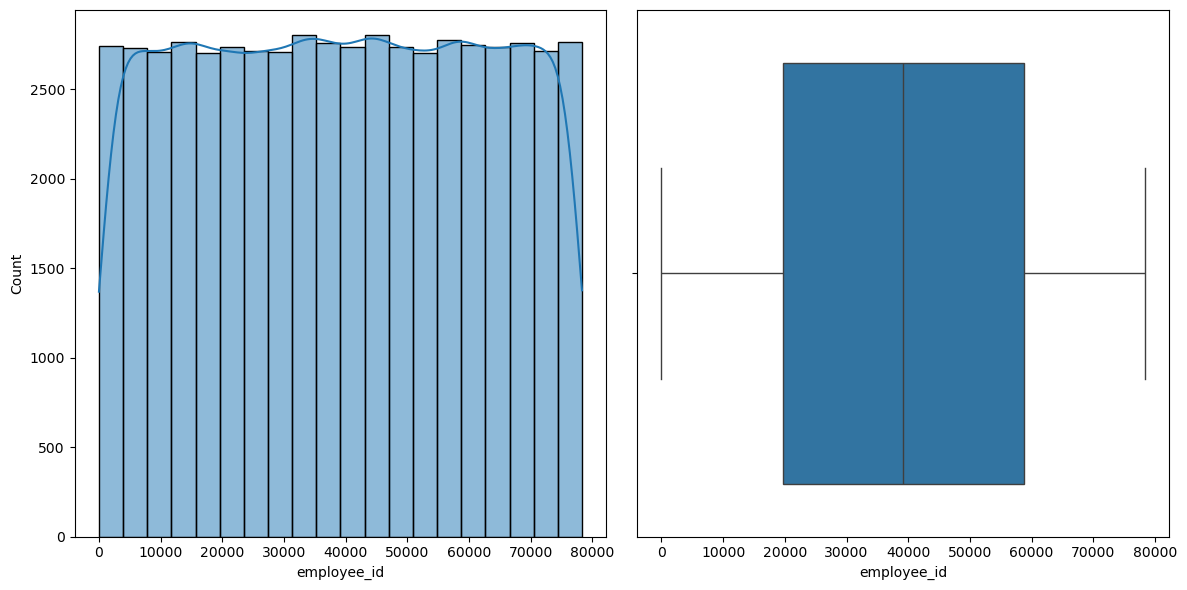

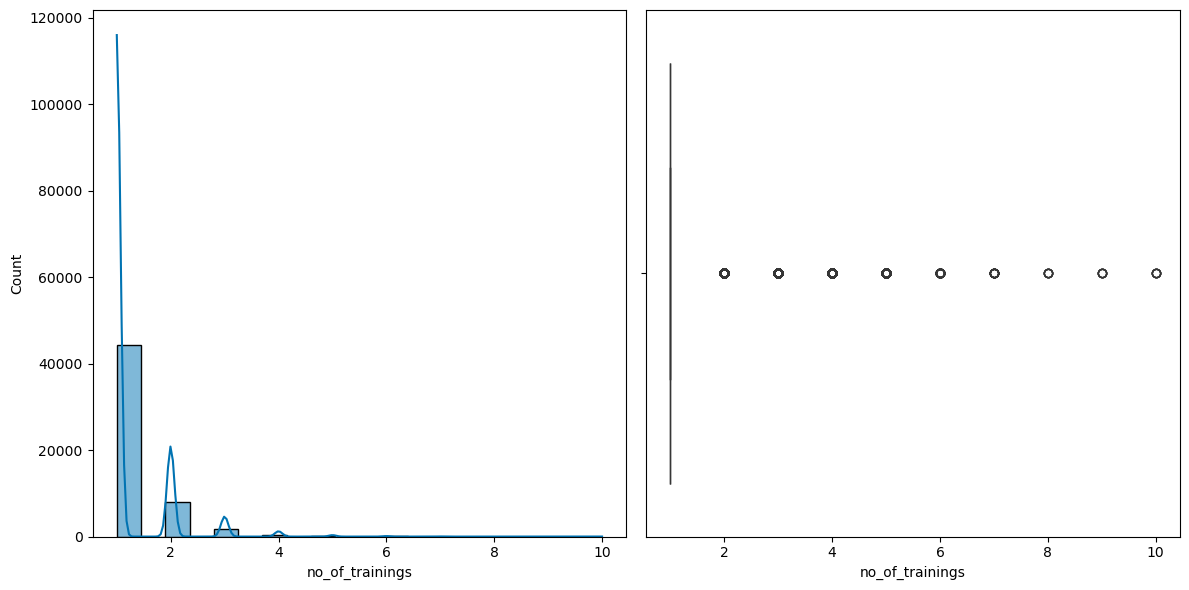

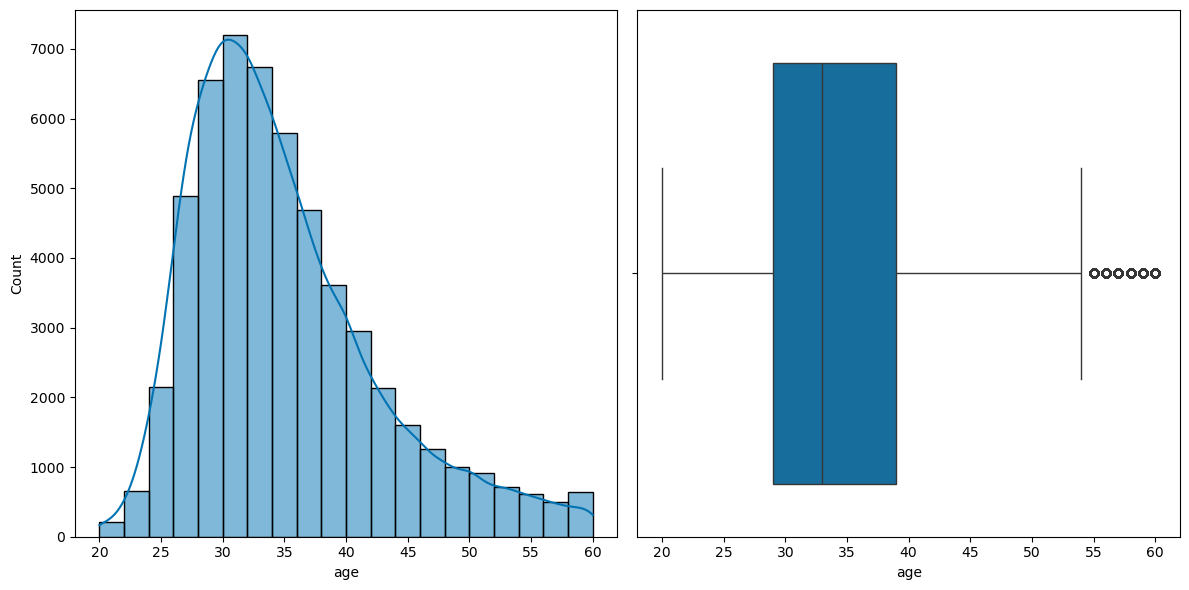

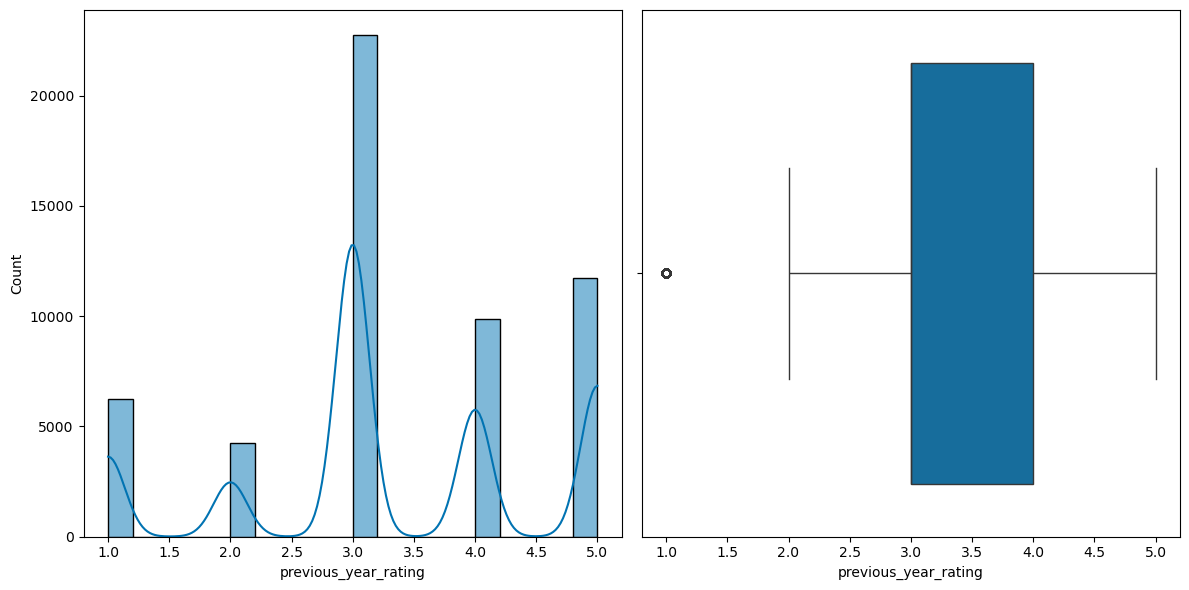

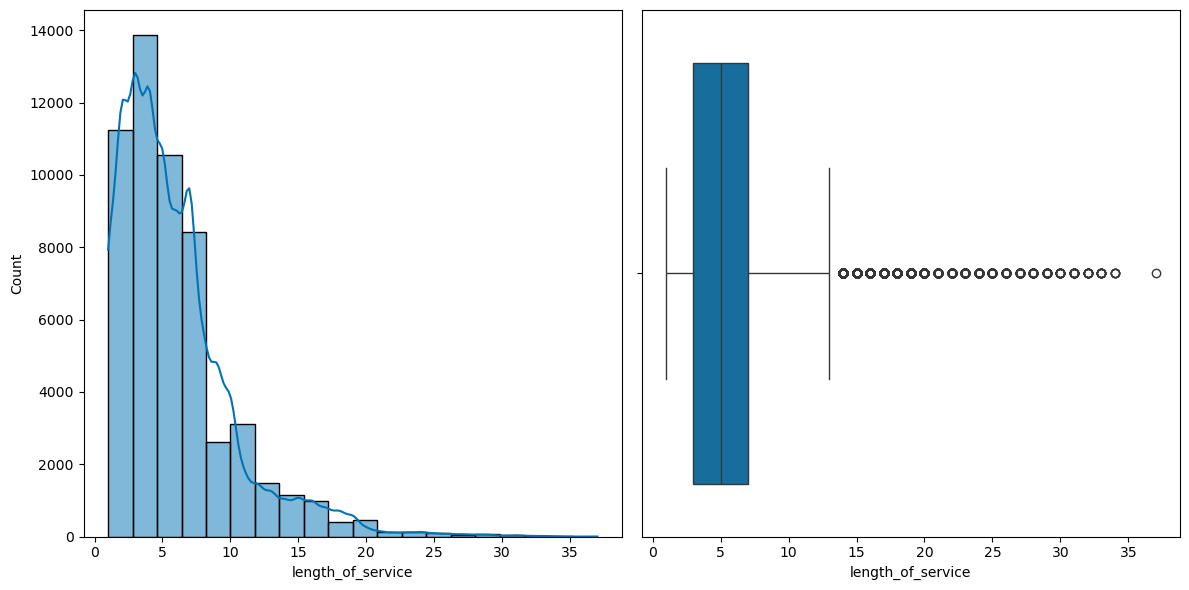

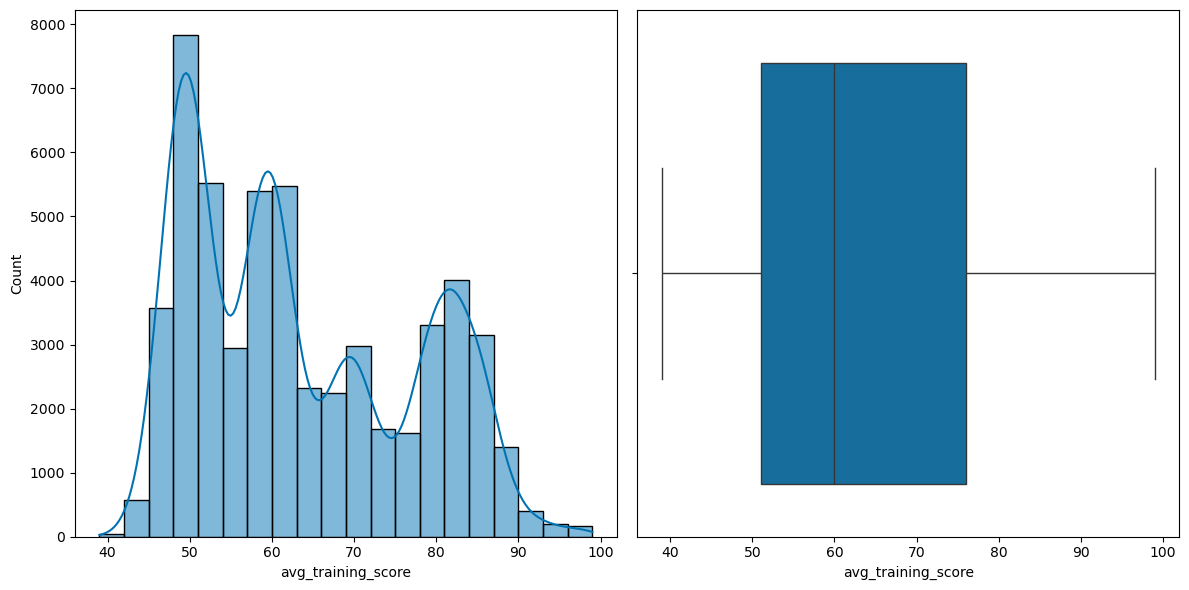

In [50]:
for col in numeric_data:
    fig, p = plt.subplots(1,2, figsize=(12, 6))
    sns.set_palette('colorblind')
    sns.histplot(x=numeric_data[col],ax=p[0],bins=20,kde =True)
    sns.boxplot(x=numeric_data[col],ax=p[1])
    plt.tight_layout()
    plt.show()

<h4 style="color: orange;">Insights from Univariate Analysis Summary for Numeric Column</h4>

- **employee_id:** Unique employee_id for each row.  
- **no_of_trainings:** 75% of employees have completed 2 or fewer training with maximum as 10.
- **age :** The age column has symetric distribution with few outlieris above age of 55.Most people have age between 30 to 40
- **previous_year_rating**The IQR indicates most of employees have rating 3 and 4 and there are outliers with rating as 1.
- **length_of_service:** The "length_of_service" feature shows a right-skewed distribution, where most employees have a short tenure of around 5 years or less, with some outliers having significantly longer service.
- **avg_training_score:** Most of candidates have score within range of 50 to 75 and very few outliers with score above 90.

<h3 style="color: green;">Univariate Analysis in Categorical Columns</h3>

In [52]:
# Replacing values in gender
categorical_data['gender'] = categorical_data['gender'].replace({'m': 'male', 'f': 'female'})

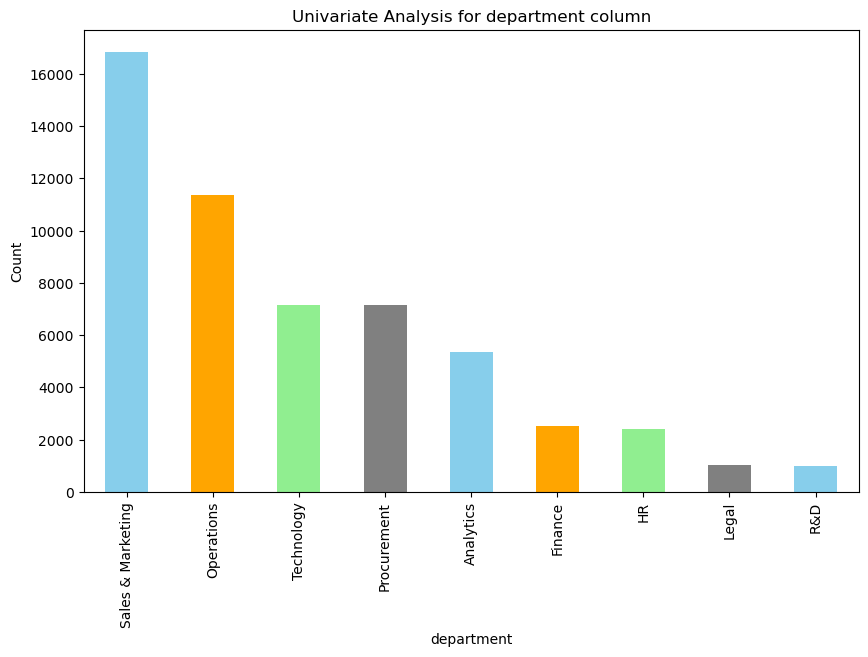

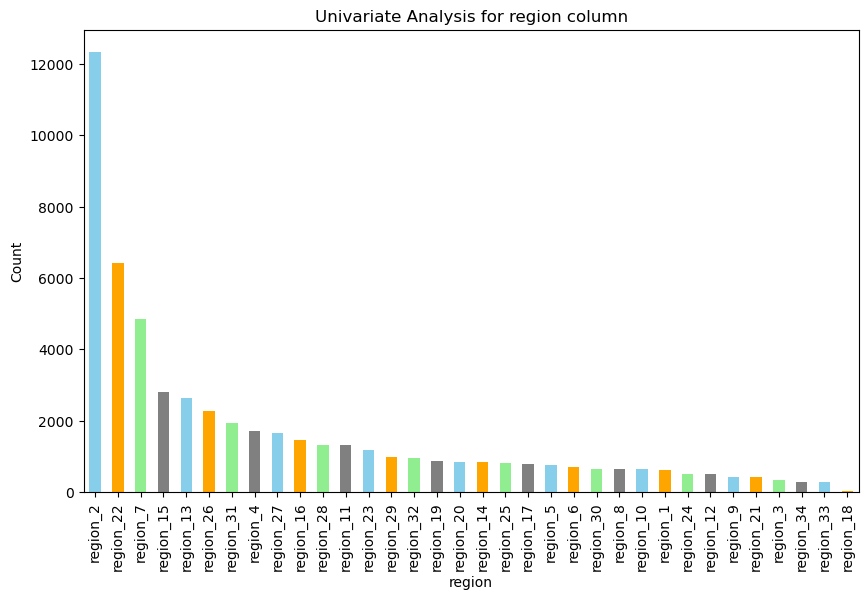

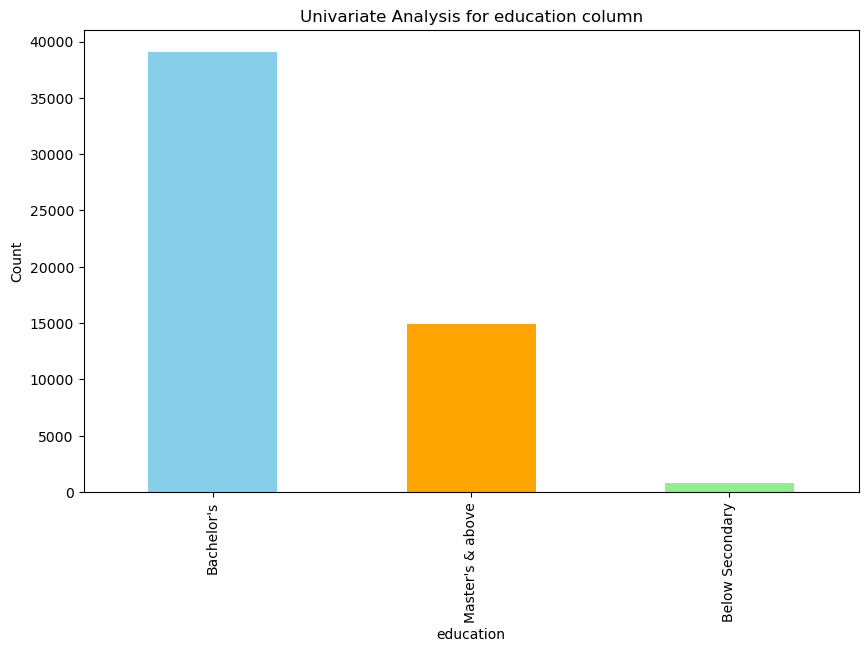

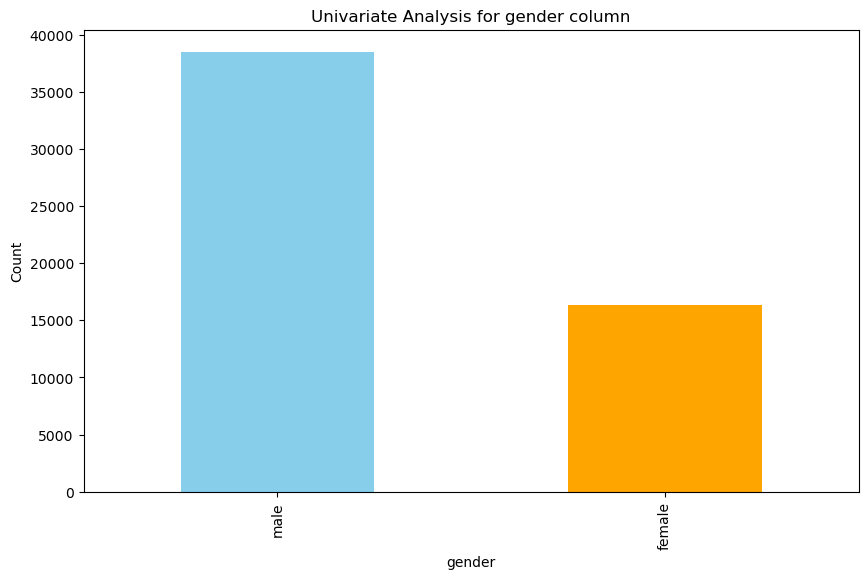

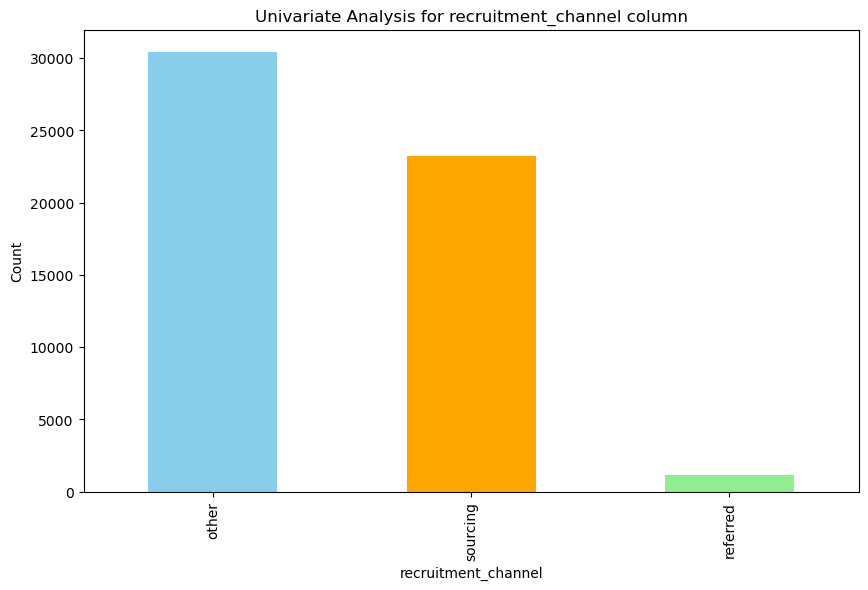

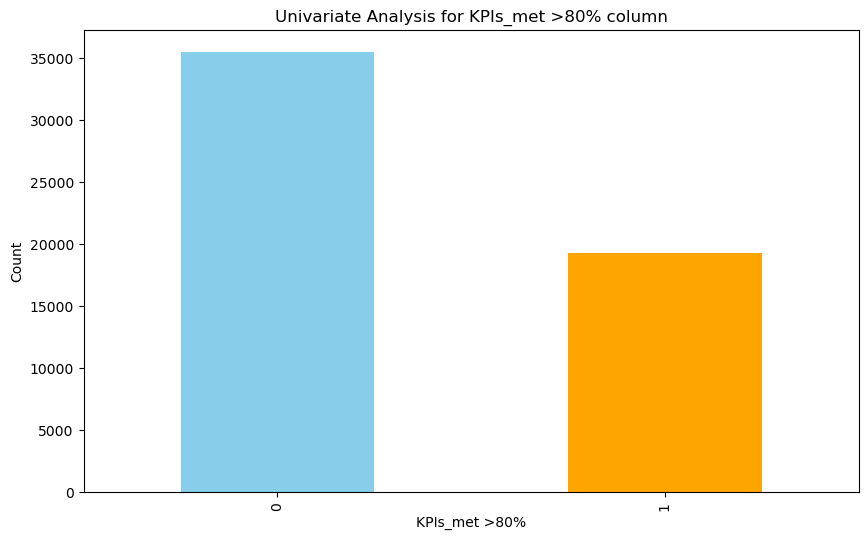

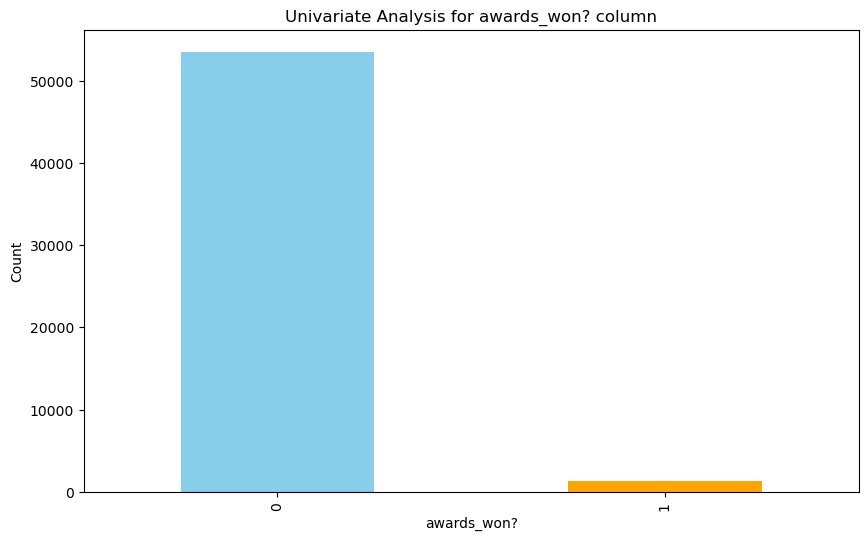

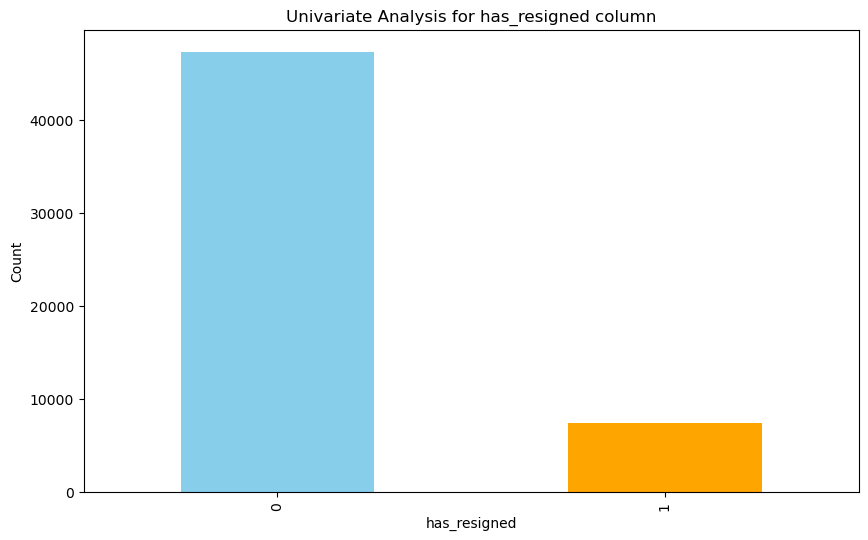

In [54]:
colors = ['skyblue', 'orange', 'lightgreen', 'grey'] 

for col in categorical_data.columns:
    counts = categorical_data[col].value_counts()
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', color=colors)
    # Customize plot
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Univariate Analysis for {col} column')
    plt.xticks(rotation=90)
    plt.show()

<h4 style="color: orange;">Insights from doing Univariate Analysis of Categorical Columns</h4>

- Most candidates are from Sales and Marketing, Operations and Technology
- Most of candidates are from region_2 , region_22 and regioN_7. The least number of candidates are from region_18
- Most candidates who have joined the organization has completed Bachelor's.
- Around 35000-40000 candidates are male and rest are female candidates
- Most of candidates who have joined the organization have recruiting channel as others or sourcing
- Around 35000 candidates have meet there KPI>80%.
- There are less than 5000 candidates who have won the awards in the previous year


<h3 style="color: green;">Segmented Analysis in Numeric Columns</h3>

In [56]:
colors = ['orange', 'cyan'] 

In [58]:
numeric_data= numeric_data.drop('employee_id', axis=1)

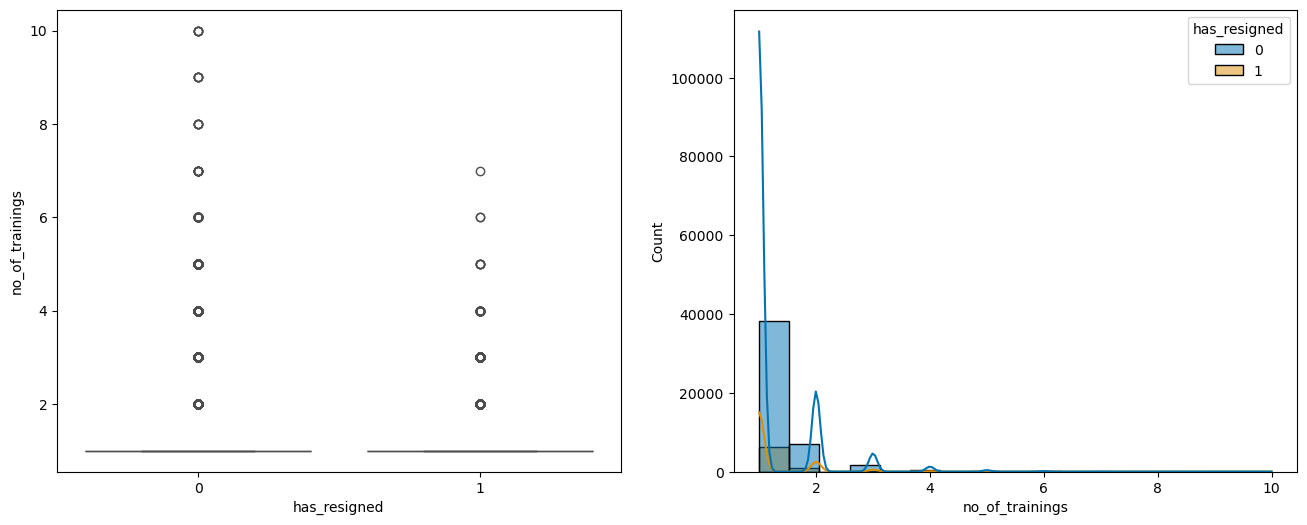

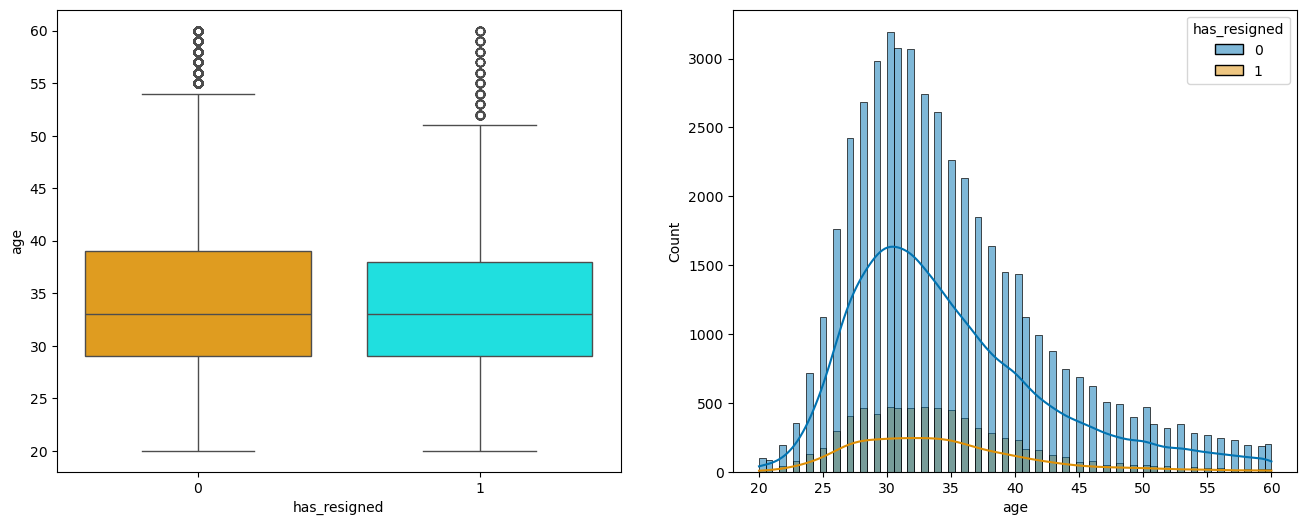

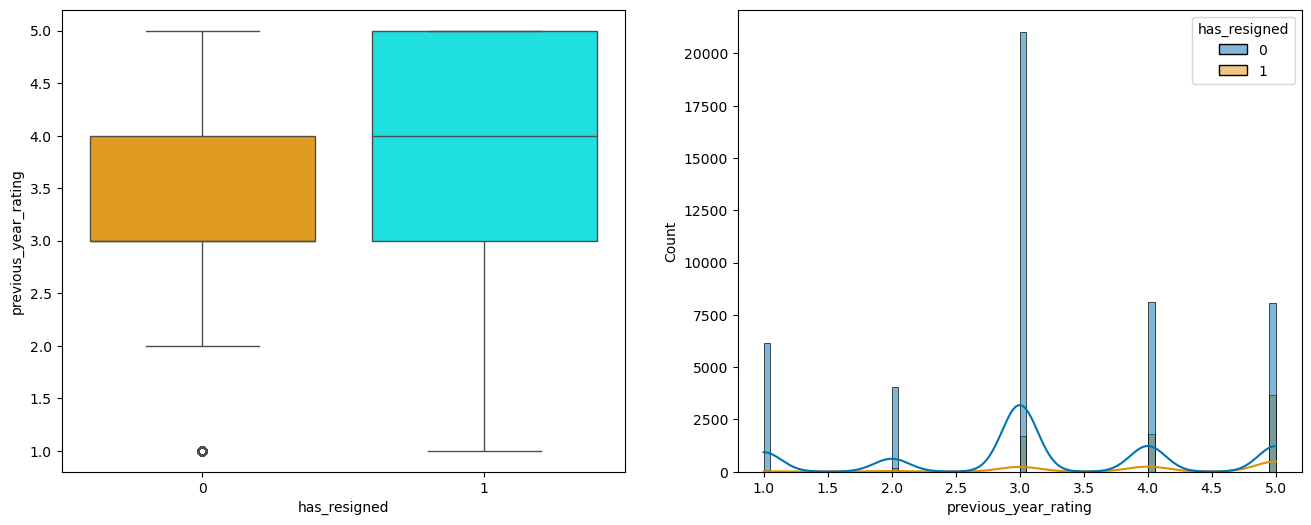

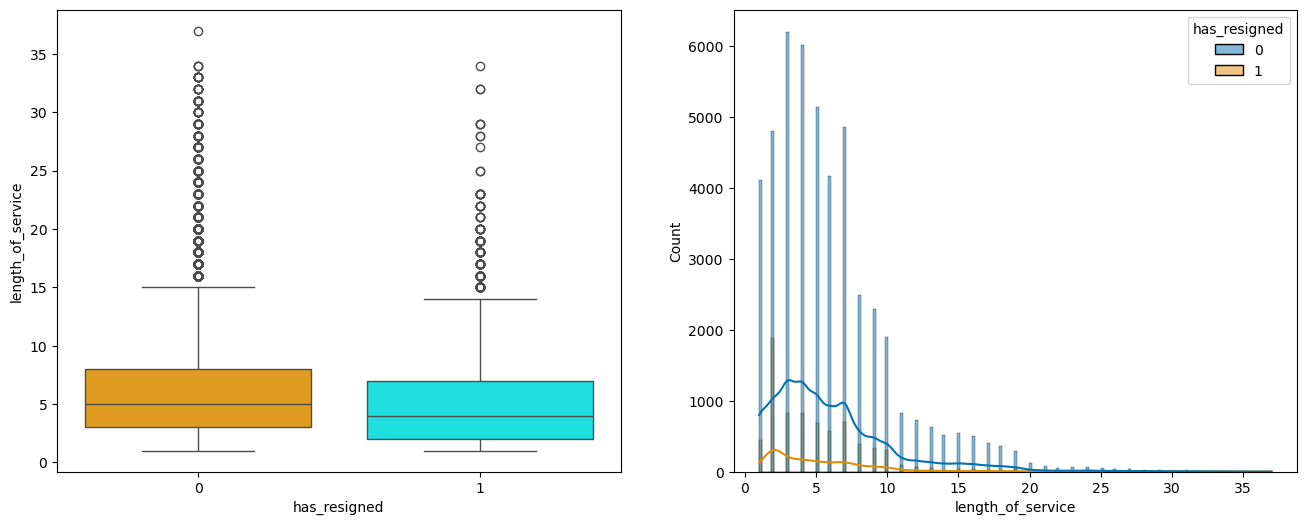

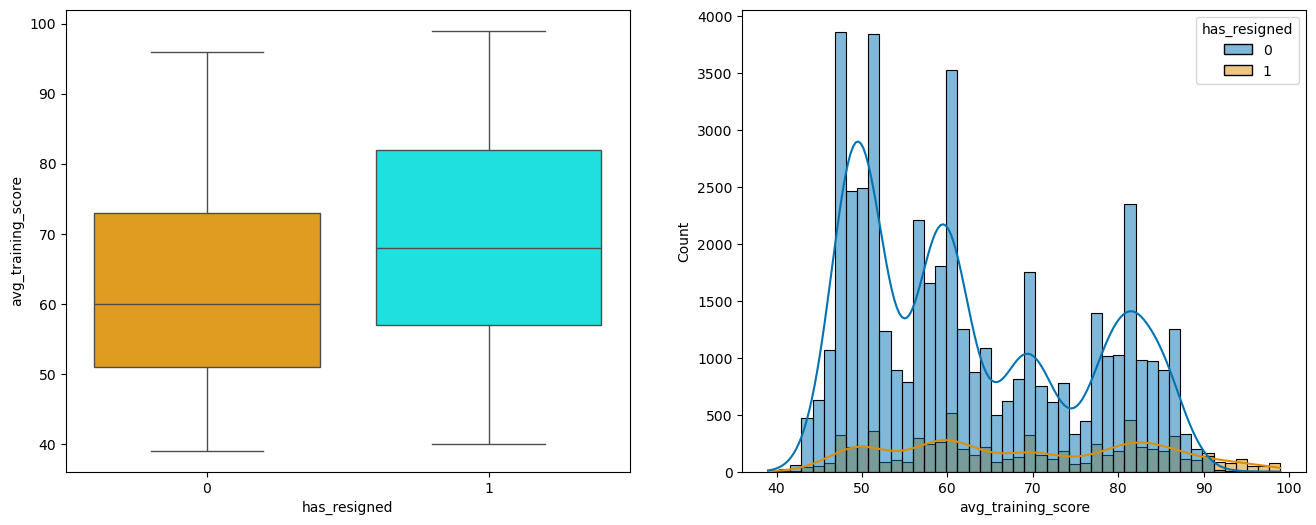

In [60]:
for col in numeric_data:
    fig, p = plt.subplots(1,2, figsize=(16, 6))
    sns.boxplot(data = df, x=df.has_resigned, y =df[col], palette=colors, hue = df.has_resigned, legend = False ,ax=p[0])
    sns.histplot(data=df, x=df[col], hue='has_resigned', kde=True, ax=p[1])
    #plt.tight_layout()
    plt.show()

In [61]:
# Attrition Rate by training
education_attrition = df.groupby('no_of_trainings')['has_resigned'].mean()
print("\nAttrition Rate by no_of_trainings:")
print(education_attrition.sort_values(ascending=False))


Attrition Rate by no_of_trainings:
no_of_trainings
1     0.138808
2     0.126581
3     0.110923
7     0.083333
4     0.076923
6     0.045455
5     0.039062
8     0.000000
9     0.000000
10    0.000000
Name: has_resigned, dtype: float64


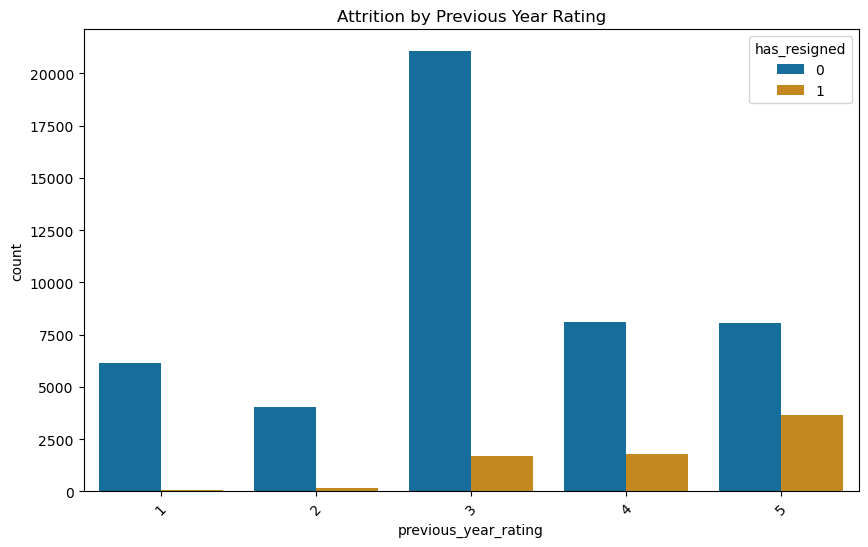

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x='previous_year_rating', hue='has_resigned', data=df)
plt.title('Attrition by Previous Year Rating')
plt.xticks(rotation=45)
plt.show()

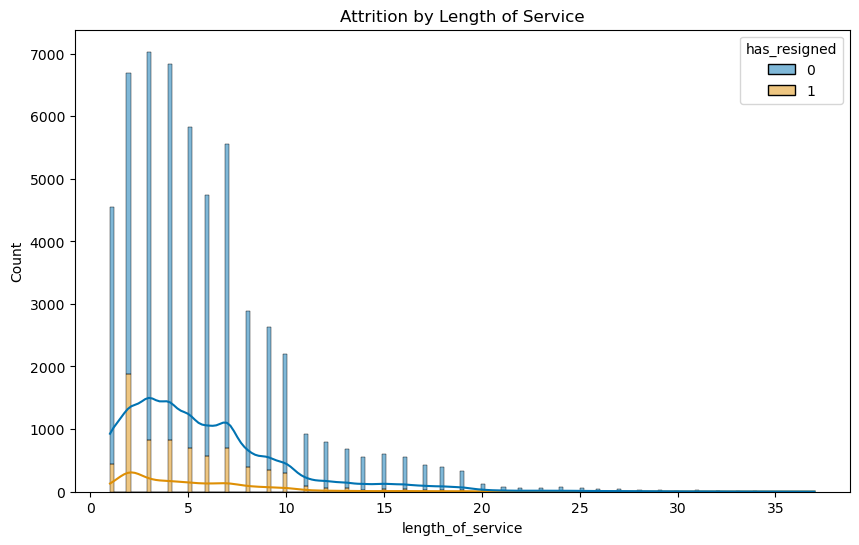

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='length_of_service', hue='has_resigned', multiple='stack', kde=True)
plt.title('Attrition by Length of Service')
plt.show()

<h4 style="color: orange;">Obsevations : Segmented Analysis in Numeric Columns</h4>

- The dependency of the resignation on no_of_trainings and age is relatively low.
- The employee who have resigned have comparitively higher previous_year_rating compared to the employees who have not resigned. Thus it seems previous_year_rating has impact on the resignation of employees.It can clearly be seen from the histogram that the their is increase in resignation as the previous_year_rating is increasing.
- The employees resigning have comparitively shorter length_of_service with organization.
- Also , employees with higher avg_training_score are the employees who are resigning.
                                                                                                



<h3 style="color: green;">Bivariate Analysis in Cateogrical Columns</h3>

In [68]:
# Attrition Rate by Department
department_attrition = df.groupby('department')['has_resigned'].mean()
print("\nAttrition Rate by Department:")
print(department_attrition.sort_values(ascending=False))


Attrition Rate by Department:
department
R&D                  0.195195
Analytics            0.162930
Technology           0.156066
Finance              0.147476
Procurement          0.146119
Operations           0.143902
Legal                0.108758
HR                   0.108354
Sales & Marketing    0.107245
Name: has_resigned, dtype: float64


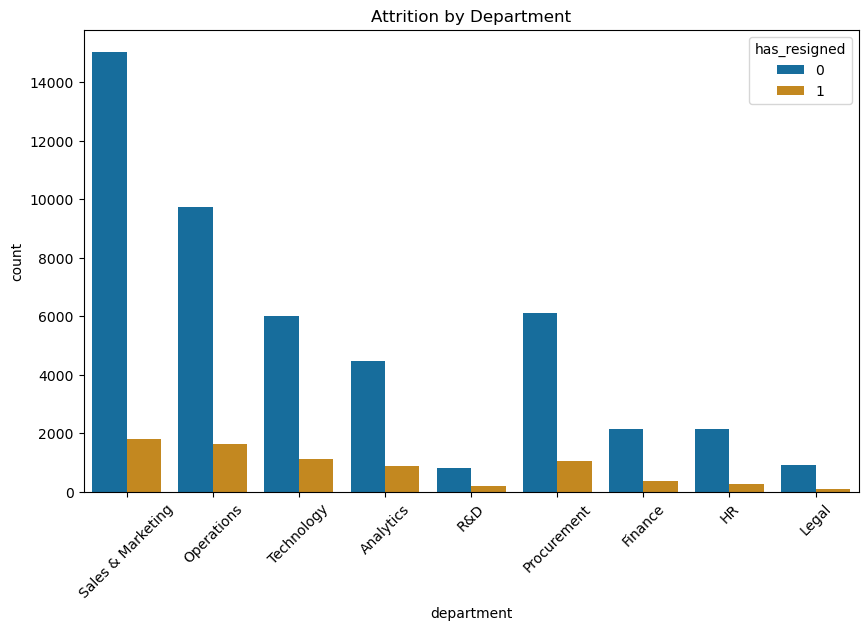

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='department', hue='has_resigned', data=categorical_data)
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()


In [72]:
# Attrition Rate by Education Level
education_attrition = df.groupby('education')['has_resigned'].mean()
print("\nAttrition Rate by Education Level:")
print(education_attrition.sort_values(ascending=False))


Attrition Rate by Education Level:
education
Master's & above    0.204757
Below Secondary     0.190062
Bachelor's          0.107554
Name: has_resigned, dtype: float64


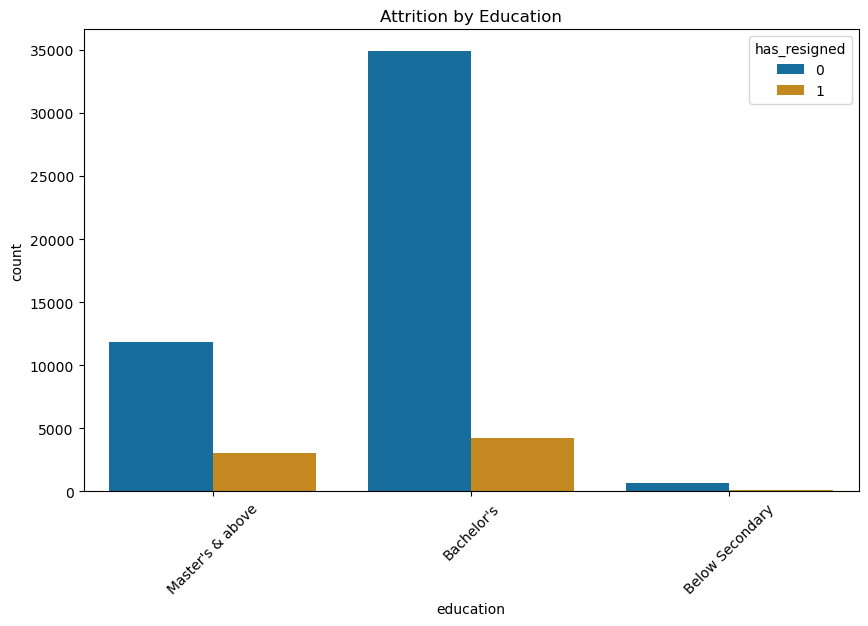

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='has_resigned', data=categorical_data)
plt.title('Attrition by Education')
plt.xticks(rotation=45)
plt.show()

In [76]:
# Attrition Rate by Region (displaying top 5)
region_attrition = df.groupby('region')['has_resigned'].mean()
print("\nAttrition Rate by Region (Top 5):")
print(region_attrition.sort_values(ascending=False).head(5))


Attrition Rate by Region (Top 5):
region
region_4     0.220787
region_25    0.199023
region_28    0.198786
region_22    0.180616
region_23    0.178723
Name: has_resigned, dtype: float64


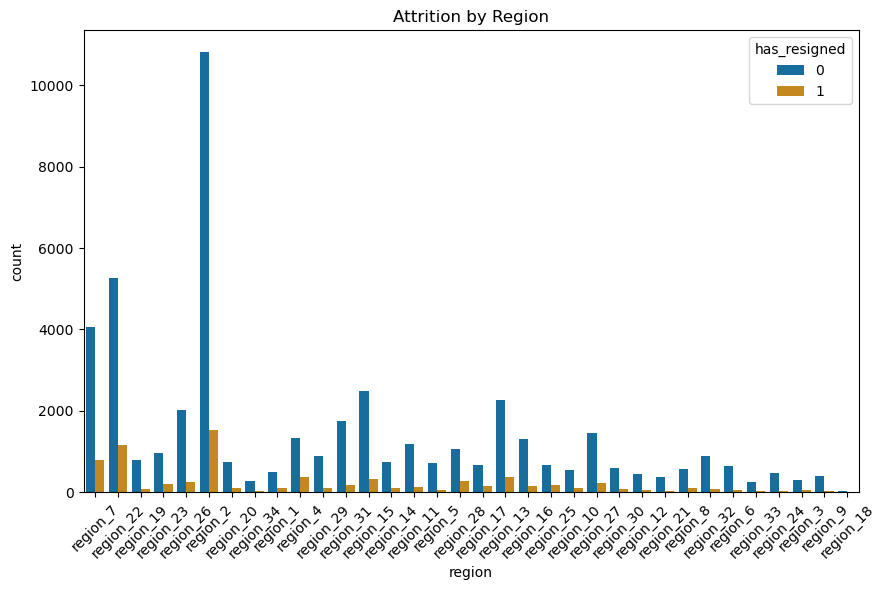

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='has_resigned', data=categorical_data)
plt.title('Attrition by Region')
plt.xticks(rotation=45)
plt.show()

In [80]:
#Attrition Rate by Gender
gender_attrition = df.groupby('gender')['has_resigned'].mean()
print("\nAttrition Rate by Gender:")
print(gender_attrition)


Attrition Rate by Gender:
gender
f    0.115069
m    0.143781
Name: has_resigned, dtype: float64


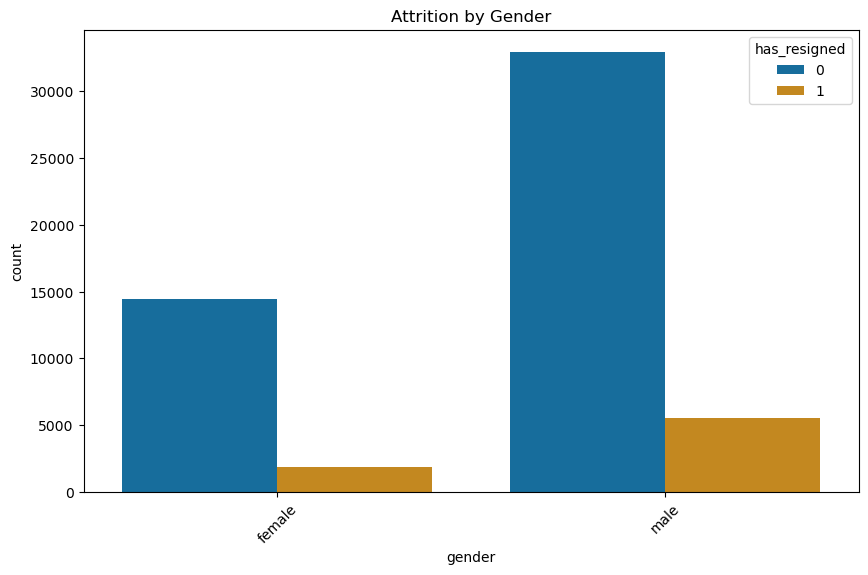

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='has_resigned', data=categorical_data)
plt.title('Attrition by Gender')
plt.xticks(rotation=45)
plt.show()

In [84]:
#Attrition Rate by Recruitment Channel
recruitment_channel_attrition = df.groupby('recruitment_channel')['has_resigned'].mean()
print("\nAttrition Rate by Recruitment Channel:")
print(recruitment_channel_attrition)


Attrition Rate by Recruitment Channel:
recruitment_channel
other       0.133614
referred    0.197023
sourcing    0.134324
Name: has_resigned, dtype: float64


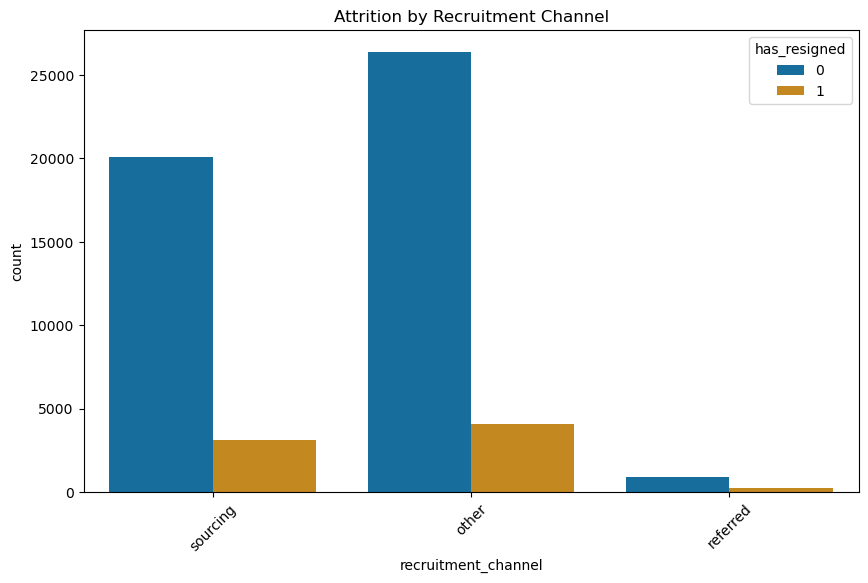

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x='recruitment_channel', hue='has_resigned', data=categorical_data)
plt.title('Attrition by Recruitment Channel')
plt.xticks(rotation=45)
plt.show()

In [88]:
#Attrition Rate by KPI
kpi_met_attrition = df.groupby('KPIs_met >80%')['has_resigned'].mean()
print("\nAttrition Rate by if KPI met > 80%:")
print(kpi_met_attrition)


Attrition Rate by if KPI met > 80%:
KPIs_met >80%
0    0.039587
1    0.311337
Name: has_resigned, dtype: float64


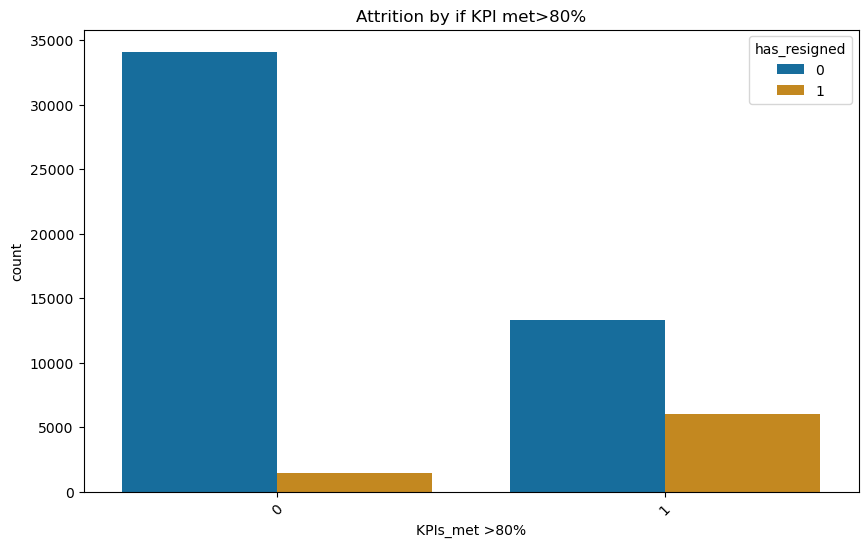

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(x='KPIs_met >80%', hue='has_resigned', data=df)
plt.title('Attrition by if KPI met>80%')
plt.xticks(rotation=45)
plt.show()

In [92]:
#Attrition Rate if awards won
awards_won_attrition = df.groupby('awards_won?')['has_resigned'].mean()
print("\nAttrition Rate by if any awards won in previous year:")
print(awards_won_attrition)


Attrition Rate by if any awards won in previous year:
awards_won?
0    0.126919
1    0.485827
Name: has_resigned, dtype: float64


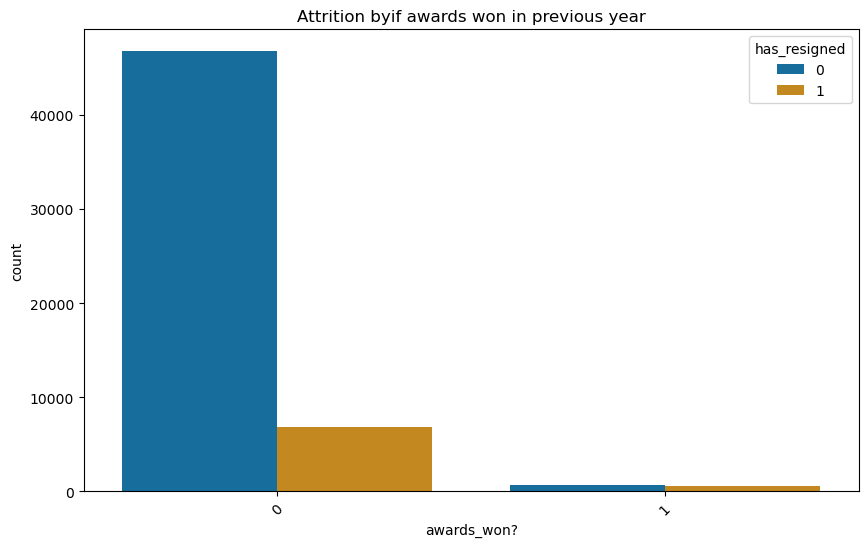

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(x='awards_won?', hue='has_resigned', data=df)
plt.title('Attrition byif awards won in previous year')
plt.xticks(rotation=45)
plt.show()

<h4 style="color: orange;">Obsevations : Bivariate Analysis in Categoric Columns</h4>

-  We can clearly see higher resignation if employee has KPI_meet greater than 80% in previous year.  
-  We can also see that there are more resignation by employee who have won awards in previous year.
                                                                                             

<h3 style="color: green;">Bivariate Analysis in Numeric Columns</h3>

In [96]:
numeric_data.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
no_of_trainings,1.000000,-0.081278,-0.061564,-0.057275,0.042517
age,-0.081278,1.000000,0.026810,0.657111,-0.048380
previous_year_rating,-0.061564,0.026810,1.000000,0.023504,0.071926
length_of_service,-0.057275,0.657111,0.023504,1.000000,-0.038122
avg_training_score,0.042517,-0.048380,0.071926,-0.038122,1.000000


<Axes: >

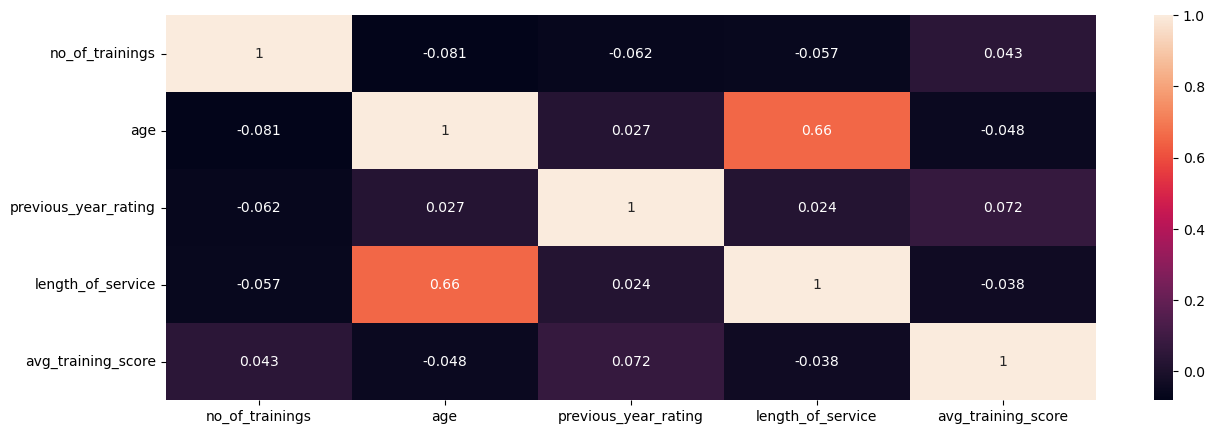

In [98]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(numeric_data.corr(), annot=True)

With the heatmap we can see none of numeric features other than age and length_fo_service have corelations  
length_of_service and age are partially corelated but we do not see any features other than this two are corelated in any way. 

<h2 style="color: blue; font-family: 'Times New Roman', serif; font-weight: bold; font-size: 30px">5. Feature Engineering</h2>

- We encoded categorical variables for training the model  
- We also split data in test and train with 30% in test.
- Also we did standarization on features for Logistic regression
                                                                                             

In [100]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [102]:
# Label encode categorical variables
le = LabelEncoder()
df['department'] = le.fit_transform(df['department'])
df['region'] = le.fit_transform(df['region'])
df['education'] = le.fit_transform(df['education'])
df['gender'] = le.fit_transform(df['gender'])
df['recruitment_channel'] = le.fit_transform(df['recruitment_channel'])

In [104]:
# Separate features and target variable
X = df.drop(columns=['employee_id', 'has_resigned'])
y = df['has_resigned']

In [106]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<h2 style="color: blue; font-family: 'Times New Roman', serif; font-weight: bold; font-size: 30px">6. Building the model (Optional)</h2>

<h3 style="color: green;">Logistic Regression Model</h3>

In [108]:
# Standardize the features for Logistic Regression
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train)
X_test_lr = scaler.transform(X_test)

<h4 style="color: orange;">Building the model</h4>

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [112]:
# Build the model
model = LogisticRegression(random_state=0)
model.fit(X_train_lr, y_train)

LogisticRegression(random_state=0)

<h4 style="color: orange;">Predicting Probabilities on the model</h4>

In [114]:
# Predict probabilities for the training set
y_proba_train = model.predict_proba(X_train_lr)[:, 1]
y_pred_train = model.predict(X_train_lr)

In [116]:
# Predict probabilities for the test set
y_proba_test = model.predict_proba(X_test_lr)[:, 1]
y_pred_test = model.predict(X_test_lr)

<h4 style="color: orange;">Evaluating model performance</h4>

In [118]:
# Calculating AUC score for model
from sklearn.metrics import roc_auc_score, roc_curve

auc_train = roc_auc_score(y_train, y_proba_train)
auc_test = roc_auc_score(y_test, y_proba_test)

print(f'Train AUC: {auc_train:.4f}')
print(f'Test AUC: {auc_test:.4f}')

Train AUC: 0.8695
Test AUC: 0.8692


In [120]:
# Calculate the KS Statistic for train and test data

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_proba_train)
ks_statistic_train= max(tpr_train - fpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_proba_test)
ks_statistic_test= max(tpr_test - fpr_test)

print(f'Train KS Statistic: {ks_statistic_train:.4f}')
print(f'Test KS Statistic: {ks_statistic_test:.4f}')


Train KS Statistic: 0.5737
Test KS Statistic: 0.5729


Accuracy: 0.89
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     14216
           1       0.68      0.35      0.46      2227

    accuracy                           0.89     16443
   macro avg       0.79      0.66      0.70     16443
weighted avg       0.88      0.89      0.87     16443



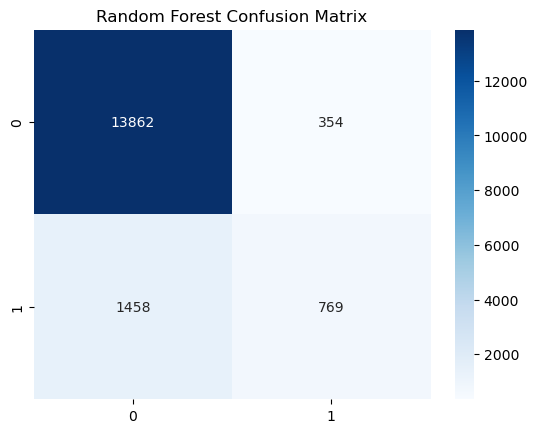

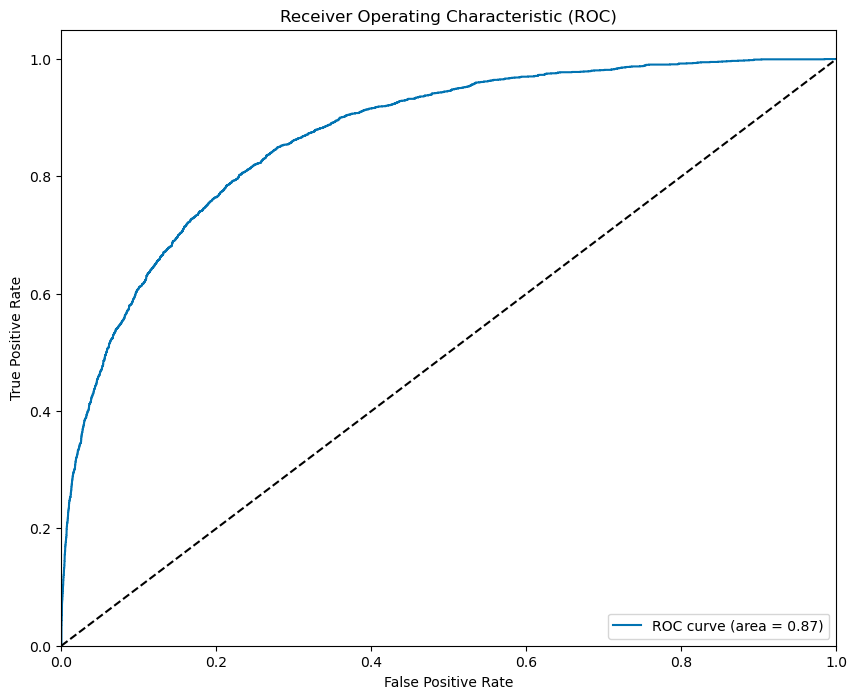

In [122]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_test))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test,y_proba_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

<h4 style="color: orange;">Top Features from the model</h4>

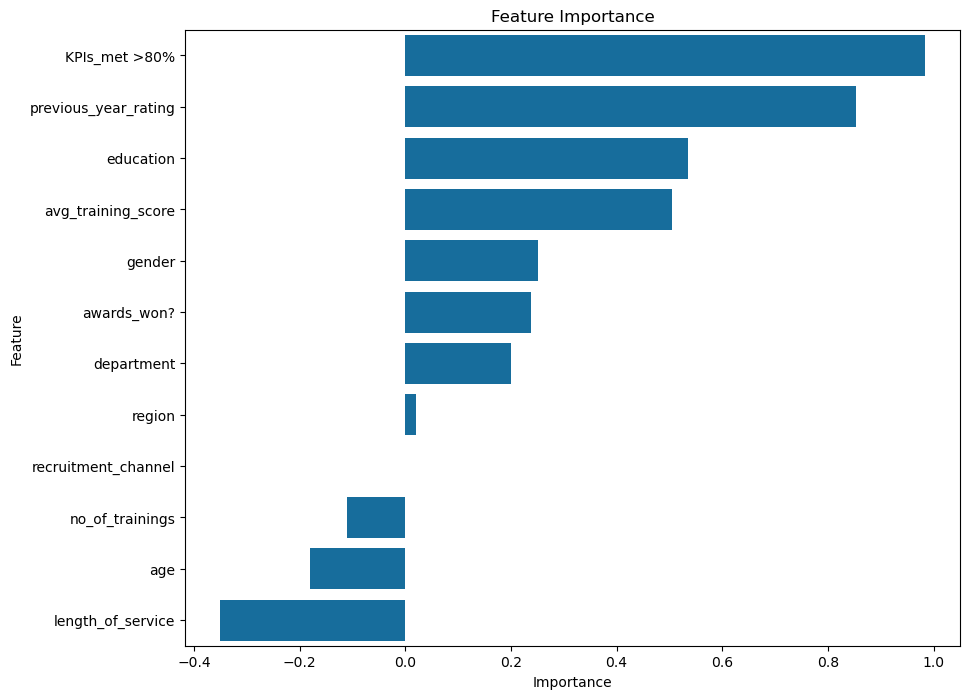

In [124]:
# Checking feature importance for Logistic Regression
importance = model.coef_[0]
features = X.columns

# Sort features by their importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


<h4 style="color: orange;">Obsevations :Logistic Regression Model</h4>

**Positive Importance:**

- **KPIs_met >80% :** Most influential; higher KPI scores significantly increase the likelihood of predicting resignation.
- **Previous_year_rating :** High ratings have a strong positive impact on predicting resignation.
- **Education :** Moderately important; higher education levels influence predictions.
- **Avg_training_score :** Also moderately important; higher scores likely affect the prediction.
- **Gender :** Less impactful but still a factor in predictions.
- **Awards_won? :** Winning awards suggests a lower likelihood of predicting resignation.
- **Department :** Has some influence on predictions.
- **Region :** Minimal impact on predictions.
- **Recruitment_channel :** Almost no influence.

**Negative Importance:**

- **No_of_trainings :** More trainings slightly decrease the likelihood of predicting resignation.
- **Age :** Older employees are slightly less likely to be predicted to resign.
- **Length_of_service :** Longer service strongly reduces the likelihood of predicting resignation.

**Summary**

- **High Positive Importance:** Features like KPIs_met >80%, previous_year_rating, education, and avg_training_score are critical in predicting resignation.
- **Negative Importance:** Length_of_service, age, and no_of_trainings decrease the likelihood of predicting resignation.

                                                                                            

<h3 style="color: green;">Random Forest Classififcation Model-1</h3>

<h4 style="color: orange;">Building the model</h4>

In [126]:
# Importing Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
# Build the Random Forest model
model = RandomForestClassifier(
    random_state=0,
    n_estimators=300,
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=2,
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, random_state=0)

<h4 style="color: orange;">Predicting Probabilities on the model</h4>

In [129]:
# Predict probabilities for the training set
y_proba_train = model.predict_proba(X_train_lr)[:, 1]
y_pred_train = model.predict(X_train_lr)

In [130]:
# Predict probabilities for the test set
y_proba_test = model.predict_proba(X_test_lr)[:, 1]
y_pred_test = model.predict(X_test_lr)

<h4 style="color: orange;">Evaluating model performance</h4>

In [134]:
# Calculating AUC score for model
from sklearn.metrics import roc_auc_score, roc_curve

auc_train = roc_auc_score(y_train, y_proba_train)
auc_test = roc_auc_score(y_test, y_proba_test)

print(f'Train AUC: {auc_train:.4f}')
print(f'Test AUC: {auc_test:.4f}')

Train AUC: 0.8088
Test AUC: 0.8137


In [136]:
# Calculate the KS Statistic for train and test data

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_proba_train)
ks_statistic_train= max(tpr_train - fpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_proba_test)
ks_statistic_test= max(tpr_test - fpr_test)

print(f'Train KS Statistic: {ks_statistic_train:.4f}')
print(f'Test KS Statistic: {ks_statistic_test:.4f}')


Train KS Statistic: 0.5560
Test KS Statistic: 0.5644


Accuracy: 0.86
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     14216
           1       0.00      0.00      0.00      2227

    accuracy                           0.86     16443
   macro avg       0.43      0.50      0.46     16443
weighted avg       0.75      0.86      0.80     16443



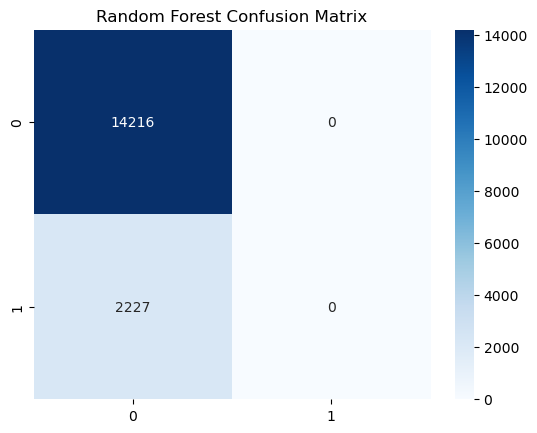

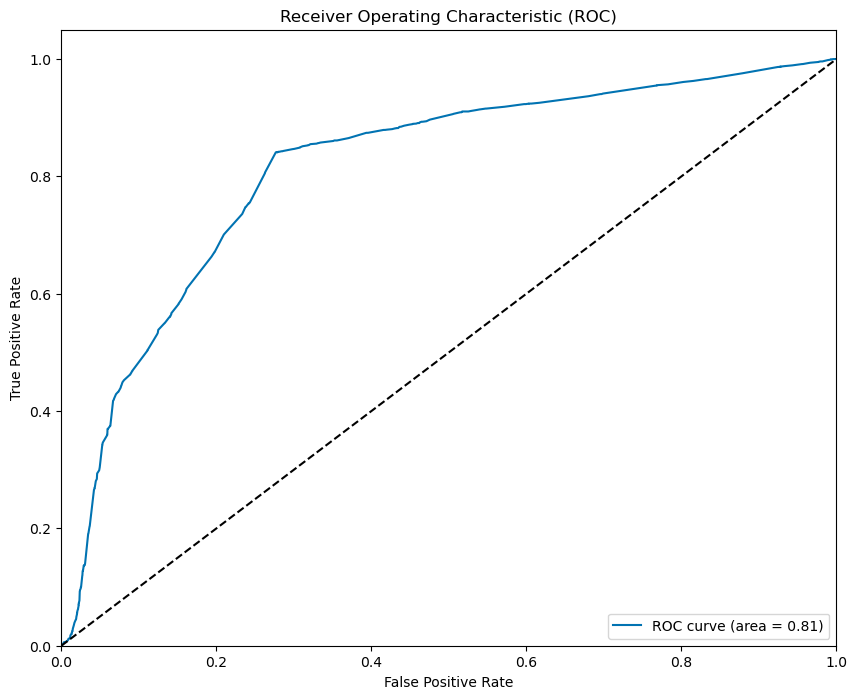

In [138]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_test))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test,y_proba_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

<h4 style="color: orange;">Top Features from the model</h4>

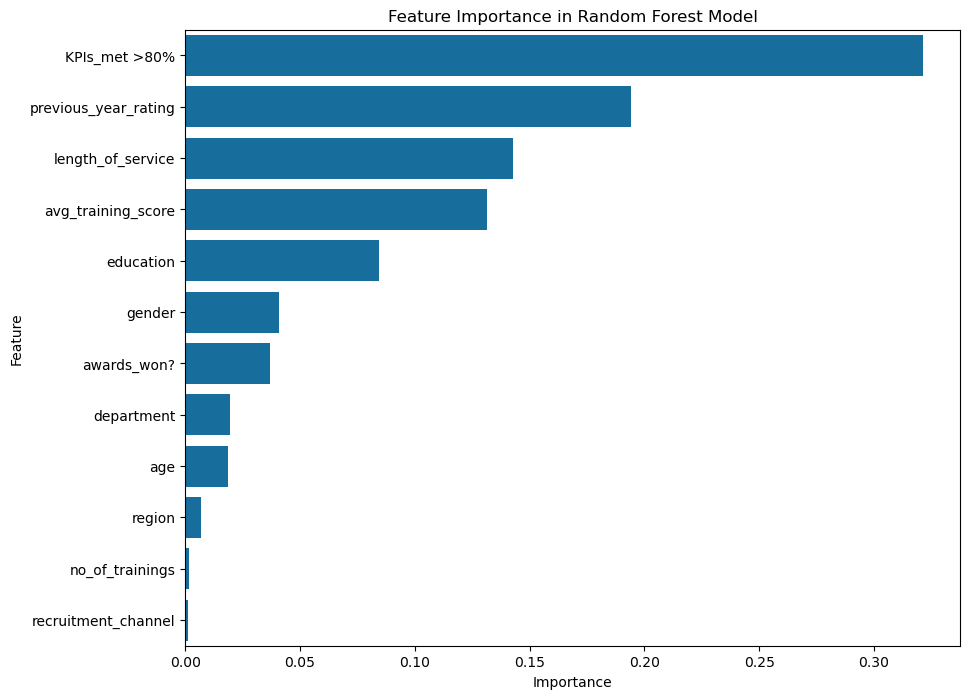

In [140]:
# Get feature importance
feature_importance = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()


<h4 style="color: orange;">Obsevations : Random Forest Classification Model 1</h4>
 <p> In this model we have not taking into the consideration or given importance to minority class thus the accuracy for this model is high and we have low recall for the positive class.</p>
 <p>Below are top features</p>

- **KPIs_met >80% :** Most influential; higher KPI scores significantly increase the likelihood of predicting resignation.
- **Previous_year_rating :** High ratings have a strong positive impact on predicting resignation.
- **length_of_service :** Moderately important; higher elength_of_service levels influence predictions.
- **Avg_training_score :** High avg_training_score result have more impact on the resignation

**Summary**

- We can clearly see the employess having KPI more than 80% , having good previous_year_rating , more length_of_service and more avg_training_score have more chances of resignation.



                                                                                             

<h3 style="color: green;">Random Forest Classififcation Model-2</h3>

<h4 style="color: orange;">Building the model</h4>

In [142]:
# Build the Random Forest model
model = RandomForestClassifier(
    random_state=0,
    n_estimators=300,
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced'
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=0)

<h4 style="color: orange;">Predicting Probabilities on the model</h4>

In [144]:
# Predict probabilities for the training set
y_proba_train = model.predict_proba(X_train_lr)[:, 1]
y_pred_train = model.predict(X_train_lr)

In [146]:
# Predict probabilities for the test set
y_proba_test = model.predict_proba(X_test_lr)[:, 1]
y_pred_test = model.predict(X_test_lr)

<h4 style="color: orange;">Evaluating model performance</h4>

In [149]:
# Calculating AUC score for model
from sklearn.metrics import roc_auc_score, roc_curve

auc_train = roc_auc_score(y_train, y_proba_train)
auc_test = roc_auc_score(y_test, y_proba_test)

print(f'Train AUC: {auc_train:.4f}')
print(f'Test AUC: {auc_test:.4f}')

Train AUC: 0.7817
Test AUC: 0.7804


In [151]:
# Calculate the KS Statistic for train and test data

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_proba_train)
ks_statistic_train= max(tpr_train - fpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_proba_test)
ks_statistic_test= max(tpr_test - fpr_test)

print(f'Train KS Statistic: {ks_statistic_train:.4f}')
print(f'Test KS Statistic: {ks_statistic_test:.4f}')


Train KS Statistic: 0.5560
Test KS Statistic: 0.5626


Accuracy: 0.86
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     14216
           1       0.00      0.00      0.00      2227

    accuracy                           0.86     16443
   macro avg       0.43      0.50      0.46     16443
weighted avg       0.75      0.86      0.80     16443



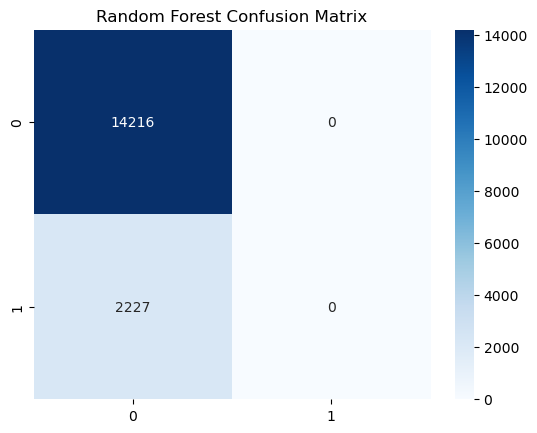

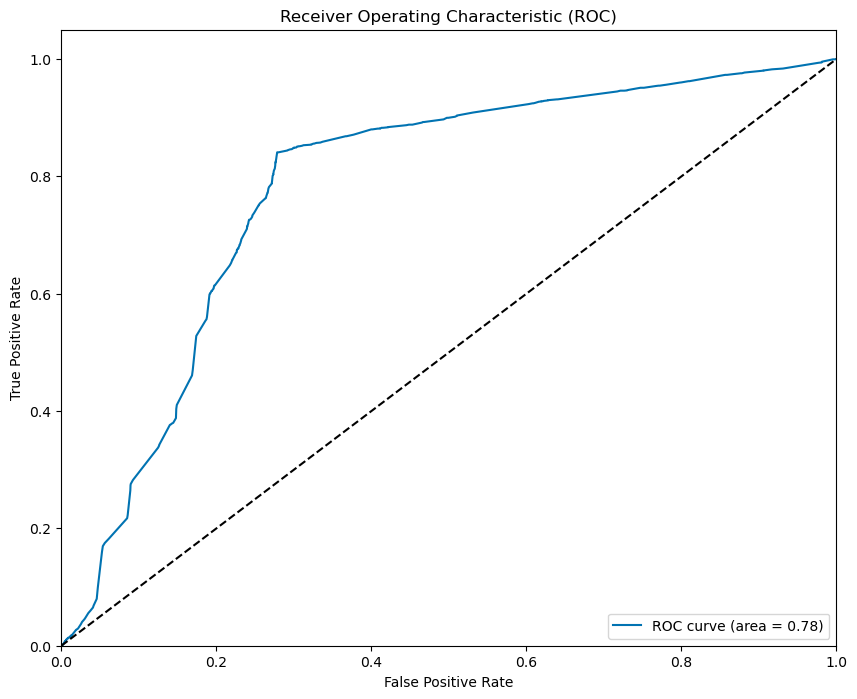

In [153]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_test))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test,y_proba_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

<h4 style="color: orange;">Top Features from the model</h4>

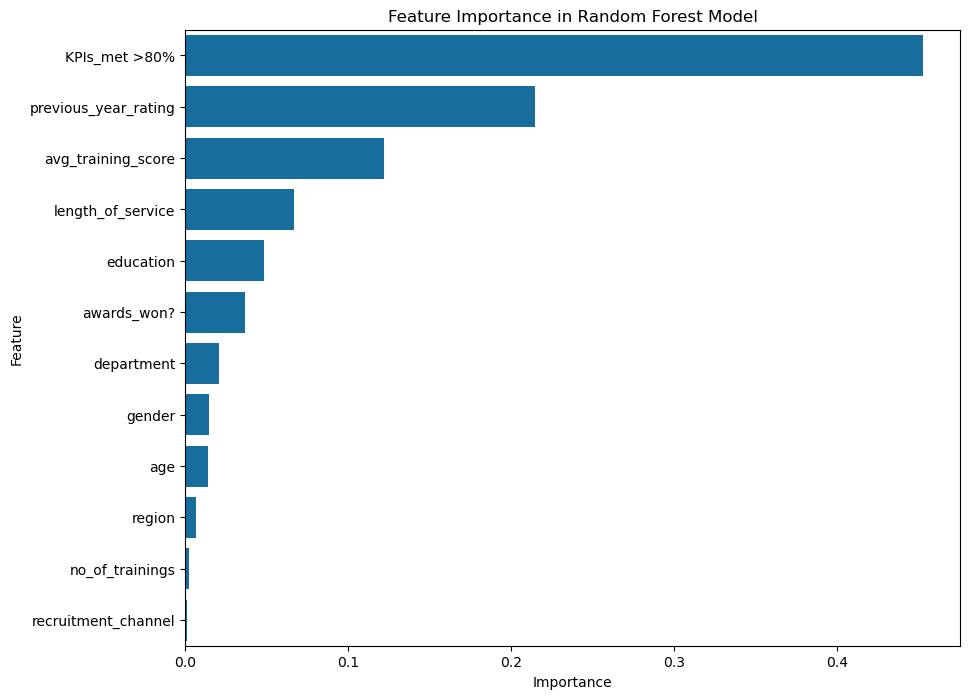

In [155]:
# Get feature importance
feature_importance = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()


<h4 style="color: orange;">Obsevations : Random Forest Classification Model 2</h4>
 <p> In this model we have taken into the consideration class weight hyperparamter thus the accuracy for this model has reduced but we have good recall for the positive class.</p>
 <p>Below are top features</p>

- **KPIs_met >80% :** Most influential; higher KPI scores significantly increase the likelihood of predicting resignation.
- **previous_year_rating :** High ratings have a strong positive impact on predicting resignation.
- **avg_training_score :** Moderately important; higher training_score influence predictions.
- **length_of_service :** Also moderately important; higher length_of_service likely affect the prediction.

**Summary**

- We can clearly see the employess having KPI more than 80% , having good previous_year_rating , more length_of_service and more avg_training_score have more chances of resignation.



                                                                                             

<h1 style="color: #663399; font-family: 'Arial', sans-serif; font-weight: bold; font-size: 36px;">Conclusion</h1>

<p style="font-family: 'Arial', sans-serif; font-siz15px0px; font-weight: bold;">
Considering all the above analyses, multiple factors can be taken into consideration from above analysis for employee iteration
</p>



<ol style="font-family: 'Arial', sans-serif; font15pxe: 20px;">
    <li><strong>department</strong>:  The R&D department has a slightly higher resignation rate, indicating potential issues that need attention..</li>
    <li><strong>region</strong>: Though this factor is not major contributor but region_4 ,region_25 , region_28 are more prone to resign. </li>
    <li><strong>education</strong>: Employees with higher educational qualifications are more likely to leave, possibly due to a mismatch between expectations and roles or a lack of growth opportunities. </li>
    <li><strong>gender</strong>: Gender does not significantly impact resignation rates, implying other factors are more influential in determining retention.</li>
    <li><strong>recruitment_channel</strong>: Employees recruited through referrals tend to resign more often, indicating potential expectation mismatches or integration challenges. </li>
    <li><strong>no_of_training</strong>:  Employees with fewer training opportunities are more likely to resign, suggesting limited skill development may lead to dissatisfaction </li>
    <li><strong>age</strong>: Age does not significantly impact resignation rates, indicating organizational factors are more critical than generational differences.</li>
    li><strong>previous_year_rating</strong>: The employees who have resigned mostly had better rating than employees who stayed back with the organization</li>
    <li><strong>length_of_service</strong>Employees with shorter lengths of service (0-2 years) are more likely to resign.After about 5 years of service, the likelihood of resignation seems to diminish, and those who have stayed longer tend to continue staying. </li>
    <li><strong>KPIs_met >80%</strong>: The most important factor as per very analysis. Most of employees who have completed more than 80% of KPIs have resigned from the organization. Also as we can see from the modelling this is one of important factor when we predict if employees are going to resign</li>
    <li><strong>awards_won?</strong>: Award-winning employees are more likely to leave, suggesting that recognition alone may not be sufficient to retain them.</li>
    <li><strong>avg_training_score</strong>: Employees with higher training scores are more likely to resign, possibly seeking more challenging roles or better opportunities.</li>
</ol>

<h1 style="color: #663399; font-family: 'Arial', sans-serif; font-weight: bold; font-size: 36px;">Recomendations ot tackle high iteration rate</h1>

<p style="font-family: 'Arial', sans-serif; font-siz15px0px; font-weight: bold;">
Considering all the above analyses, mwe have below recomendation to tackle high iteration rate
</p>



- **Enhance Employee Recognition Programs**: 
  - Develop and implement robust recognition and reward programs, especially for high performers and employees who meet or exceed KPIs. 
  - This could include monetary bonuses, public recognition, and career development opportunities.

- **Increase Access to Training and Development**: 
  - Expand training programs to ensure that all employees, especially those early in their careers, have access to skill development opportunities. 
  - This can help reduce feelings of stagnation and increase job satisfaction.

- **Improve Employee Onboarding and Integration**: 
  - Pay special attention to onboarding processes, especially for referral hires, to ensure they are well-integrated into the company culture and have realistic job expectations.

- **Conduct Regular Employee Engagement Surveys**: 
  - Implement frequent surveys to gauge employee satisfaction, identify areas of concern, and take proactive steps to address them before they lead to resignations.

- **Tailor Career Development Plans**: 
  - For employees with higher education and strong performance ratings, create personalized career development plans that align with their aspirations and provide clear paths for advancement within the organization.

- **Focus on Retaining Newer Employees**: 
  - Develop targeted retention strategies for employees in their first five years, such as mentorship programs, early career recognition, and opportunities for rapid advancement.

- **Regional Focus**: 
  - Investigate and address any regional-specific issues in high-resignation regions to ensure that all employees, regardless of location, feel supported and engaged.
